<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1>Жук Анатолий<h1>
<h3 style="text-align: center;"><b>Домашнее задание №3. Продвинутый поток. Осень 2020</b></h3>



Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.




# Первая часть. Исследование.

Импортируем необходимые для работы библиотеки.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

Подгружаем тренировочный dataset **train.csv**, указываю ссылку на свой GitHub, чтобы каждый раз не подгружать dataset вновь.<br/>

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Deep-Learning-School/main/Assignment%20%E2%84%963/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


1. Всего имеем 20 столбцов. 3 из них - числовые признаки **num_cols**. 
2. 16 их них категориальные признаки **cat_cols** + целевой столбец **target_col**. <br/>
3. Обозначаем переменной **feature_cols** название всех признаков (фичей), не считая целевой переменной. <br/>
4. Обозначаем переменной **target_col** название целевой переменной.

In [ ]:
num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
cat_cols = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService',
            'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
            'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
feature_cols = num_cols + cat_cols
target_col = 'Churn'

Рассмотри подробнее метод **info()**, получаем следующую наиболее важную информацию:<br/> 
1. В dataset'e имеется 5282 строки и 20 колонок.
2. Видим типы данных каждого столбца.
3. В наших данных отсутствуют пропуски (но не все так просто как кажется).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим, что колонка **'TotalSpent'** имеет формат Object, но по умолчанию заявлена как числовой признак, следует исправить ситуацию и отнести этот столбец к числовому формату.<br/>
И тут случается так, что мы не можем просто так перевести этот столбец в разряд числовых, возникает ошибка. Понимаем, что некоторые значения пропущены, но они обозначены не **Nan**, а просто пробелом (замаскированы). <br/>
Используя **errors='coerce'** обозначаем пробелы как **Nan**

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

Используя метод **.isna()**:<br/>
Обнаруживаем, что всего 9 пропущенных значений в исследуемой колонке. <br/>
Как и просят в задании строю табличку с количеством Nan в каждой колонке.

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Так как количество наблюдений 5282, ничего страшного не случится, если мы исключим 9 наблюдений с помощью метода **dropna()**.

In [ ]:
data = data.dropna()

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Строим гистограмму для числовых признаков, на которой можно посмотреть как распределяются значения в столбце.

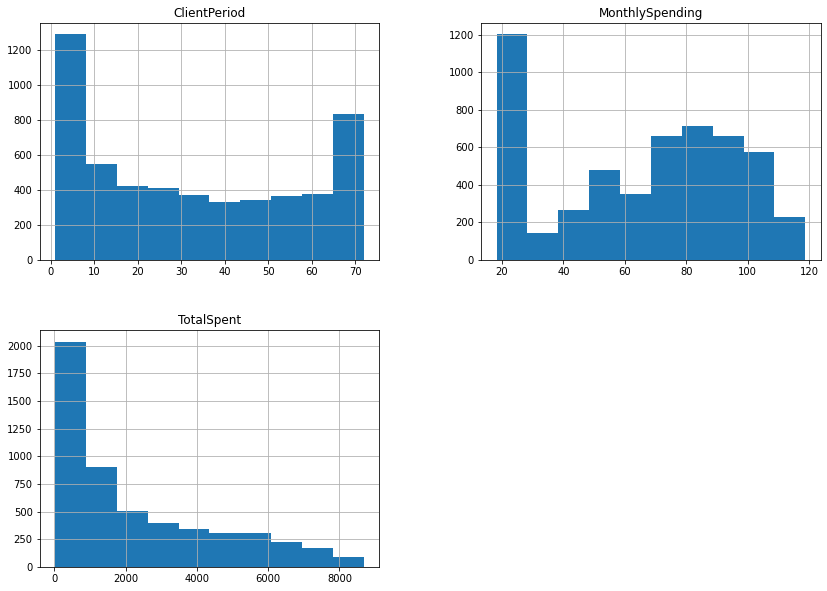

In [ ]:
data.hist(column=num_cols, figsize=(14, 10))
None

Для каждой колонки из числа категориальных переменных считаем количество уникальных значений в ней.

In [ ]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION", '\n', data[col].value_counts())
    print()

Sex DISTRIBUTION 
 Male      2651
Female    2622
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION 
 0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION 
 No     2704
Yes    2569
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION 
 No     3676
Yes    1597
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION 
 Yes    4754
No      519
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION 
 No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION 
 Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION 
 No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION 
 No                     2331
Yes                    1805
No internet service    1137
Name: Ha

Переменная **cat_data** - таблица со значениями для категориальных признаков.<br/>
Строим круговые диаграммы для всех категориальных переменных. 

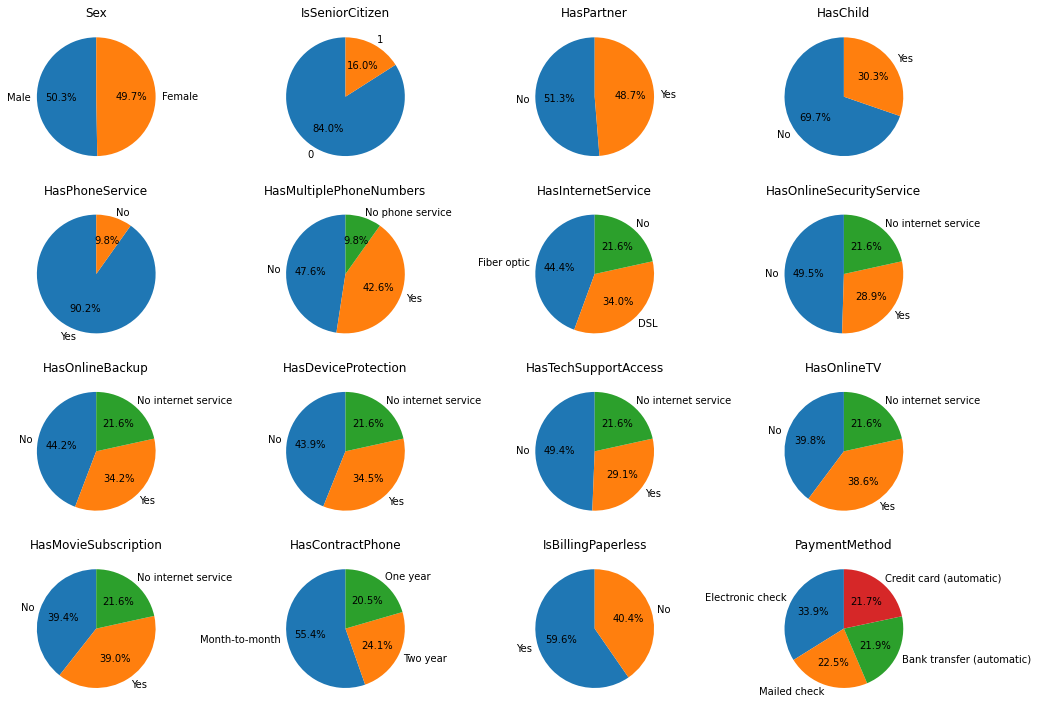

In [ ]:
cat_data = data.drop(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Churn'], axis=1)
fig, axes = plt.subplots (nrows = 4 ,ncols = 4, figsize = (14,10), sharey=True)
for j, ax in enumerate(axes.flat):
  sizes = cat_data.iloc[:, j].value_counts()
  labels = sizes.index.to_list()
  ax.set_title(cat_data.columns[j])
  ax.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=90)
  

plt.tight_layout()
plt.show()

Также строим круговую диаграмму для целевой переменной, делаем вывод, что целевая переменная несбалансированная.

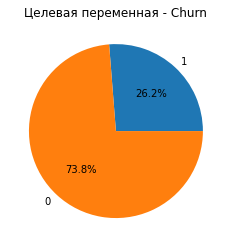

In [ ]:
labels = sorted(data[target_col].unique(), key = lambda x: (data[target_col] == x).sum())
fig, ax = plt.subplots()
ax.pie(sorted(data[target_col].value_counts()), labels = labels, autopct='%1.1f%%')
ax.set(aspect="equal", title='Целевая переменная - Churn')
None

Думаю будет сразу уместно загрузить тестовые данные, проверить их на пропущенные значения и обработать их нужным образом, таким же как мы делали это с тренировочным dataset'ом.

In [ ]:
data_test = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Deep-Learning-School/main/Assignment%20%E2%84%963/test.csv')
data_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [ ]:
data_test['TotalSpent'] = pd.to_numeric(data_test['TotalSpent'], errors='coerce')
data_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

Немного изменим подход и воспользуемся методом **fillna()**, так как в дальнейшем документ **submission.csv** будет содержать стогое число строк и если мы удалим некоторые строки как мы сделали это с **train.csv**, то это усложнит выполнение работы.

In [ ]:
data_test = data_test.fillna(0)
data_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [ ]:
data_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.60,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

Импортируем необходимые для работы библиотеки.

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Преобразуем категориальные переменные в числовые с помощью one-code encoding.

In [ ]:
data_encoding = pd.get_dummies(data, columns=cat_cols)

Обозначим данные определенным образом для дальнейшего обучения.

In [ ]:
X = data_encoding.drop(['Churn'], axis=1)
y = data_encoding['Churn']

Разделим dataset на части для тренировки и валидации.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Отнормируем числовые признаки.

In [ ]:
pca = StandardScaler()
X_train_scaled = pca.fit_transform(X_train)
X_test_scaled = pca.fit_transform(X_test)

In [ ]:
model = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], cv=5, scoring='roc_auc', fit_intercept=True)
model.fit(X_train_scaled, y_train)
model.predict_proba(X_test_scaled)
model.score(X_test_scaled, y_test)

0.8436659589525831

Для dataset'a **test.csv** также произведем процедуры one-code encoding и нормировки.

In [ ]:
data_test_coding = pd.get_dummies(data_test, columns=cat_cols)

In [ ]:
data_test_scaled = pca.fit_transform(data_test_coding)

Предсказываем вероятность. Оставляем только 1 колонку.

In [ ]:
pred_test = model.predict_proba(data_test_scaled)[:, 1]

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
X_cat = data.drop(['Churn'], axis=1)
y_cat = data['Churn']

In [ ]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

Протестируем **catboost** cо стандартными параметрами.<br/>


In [ ]:
from sklearn.metrics import roc_auc_score

model_boo_usual = CatBoostClassifier(cat_features=cat_cols, random_seed=42, eval_metric='AUC', verbose=False)
model_boo_usual.fit(X_train_cat, y_train_cat)
y_train_pred = model_boo_usual.predict_proba(X_train_cat)[:, 1]
y_test_pred = model_boo_usual.predict_proba(X_test_cat)[:, 1]

train_auc = roc_auc_score(y_train_cat.values,y_train_pred)
test_auc = roc_auc_score(y_test_cat.values,y_test_pred)
print(train_auc)
print(test_auc)

0.891567346934054
0.8416820004718094


Итак, нужно протестировать разные значения параметров **количества деревьев** и **learning_rate'а**.

In [ ]:
model_boo = CatBoostClassifier(cat_features=cat_cols, random_seed=42, eval_metric='AUC', verbose=False)
grid = {'depth' : [2, 3, 4, 5],
        'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]}
grid_search_res = model_boo.grid_search(grid, X=X_test_cat, y=y_test_cat, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8309907834
bestIteration = 342

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8309908	best: 0.8309908 (0)	total: 1.79s	remaining: 41.1s

bestTest = 0.8442396313
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8442396	best: 0.8442396 (1)	total: 3.45s	remaining: 38s

bestTest = 0.8499423963
bestIteration = 26

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8499424	best: 0.8499424 (2)	total: 5.11s	remaining: 35.7s

bestTest = 0.8572004608
bestIteration = 25

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8572005	best: 0.8572005 (3)	total: 6.79s	remaining: 34s

bestTest =

In [ ]:
grid_search_res.values()

dict_values([{'depth': 2, 'learning_rate': 0.04}, defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 2

In [ ]:
model_boo.fit(X_train_cat, y_train_cat)

In [ ]:
y_train_pred = model_boo.predict_proba(X_train_cat)[:, 1]
y_test_pred = model_boo.predict_proba(X_test_cat)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train_cat.values,y_train_pred)
test_auc = roc_auc_score(y_test_cat.values,y_test_pred)
print(train_auc)
print(test_auc)

0.8623817764533862
0.8459872611464969


In [ ]:
pred_test_cat = model_boo.predict_proba(data_test)[:, 1]

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

Итак, на **Kaggle** был получен результат 0,85241 с помощью **CatBoost**

In [ ]:
best_model = pred_test_cat

Производим необходимые процедуры для получения данных для последующей загрузки на Kaggle.

In [ ]:
submission = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Deep-Learning-School/main/Assignment%20%E2%84%963/submission.csv')
submission['Churn'] = best_model
submission.to_csv('./my_submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.